<a href="https://colab.research.google.com/github/Vcetpreeti/DS_internship/blob/main/Iris_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
import numpy as np
#outliers
#dealing with outliers :
#converting
#data sample imbalance : under and over
#feature selection
#dimentionality reduction
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lor=LogisticRegression()
df=pd.read_csv("/content/Iris.csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
df.shape

(150, 6)

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

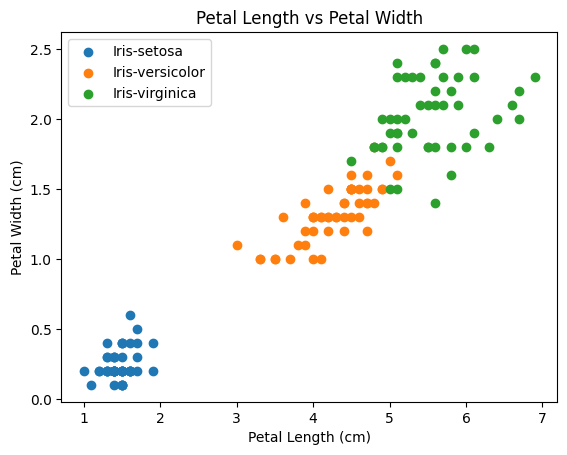

In [ ]:
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], label=species)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()

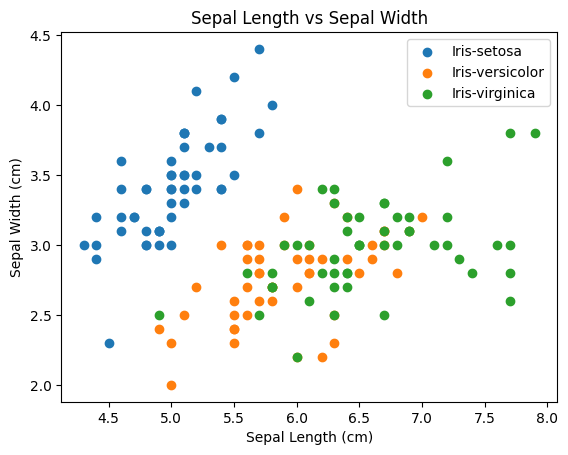

In [ ]:
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
(150, 6)


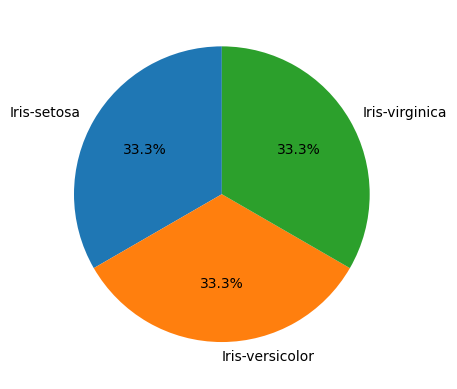

In [ ]:
# Count the occurrences of each species
species_counts = df['Species'].value_counts()
print(species_counts)
print(df.shape)

# Create the pie chart

plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)

plt.axis()
plt.show()

           Specs       Score
0  SepalLengthCm   10.817821
1   SepalWidthCm    3.594499
2  PetalLengthCm  116.169847
3   PetalWidthCm   67.244828
[0.10242917 0.05239915 0.38709447 0.4580772 ]


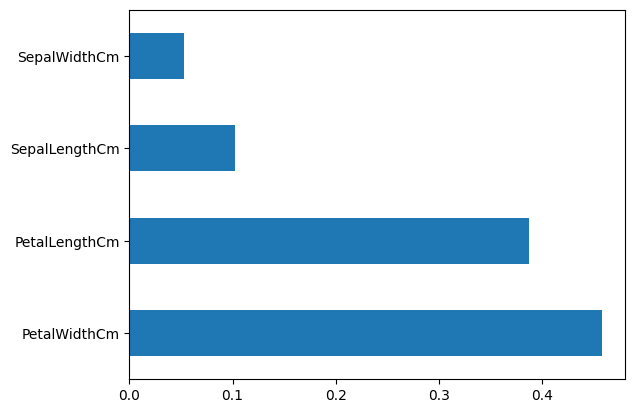

In [ ]:
#feature selection
X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']
print(featuresScores)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [ ]:
df['SepalLengthCm']=pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])
df['SepalWidthCm']=pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])
df['PetalLengthCm']=pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])
df['PetalWidthCm']=pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])

In [ ]:
# Convert categorical columns back to numeric if needed
for col in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    if df[col].dtype == 'category':
        df[col] = df[col].astype(float)

# Now apply pd.cut
df['SepalLengthCm'] = pd.cut(df['SepalLengthCm'], 3, labels=['0', '1', '2'])
df['SepalWidthCm'] = pd.cut(df['SepalWidthCm'], 3, labels=['0', '1', '2'])
df['PetalLengthCm'] = pd.cut(df['PetalLengthCm'], 3, labels=['0', '1', '2'])
df['PetalWidthCm'] = pd.cut(df['PetalWidthCm'], 3, labels=['0', '1', '2'])
print(df)

      Id SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm         Species
0      1             0            1             0            0     Iris-setosa
1      2             0            1             0            0     Iris-setosa
2      3             0            1             0            0     Iris-setosa
3      4             0            1             0            0     Iris-setosa
4      5             0            1             0            0     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146             1            1             2            2  Iris-virginica
146  147             1            0             2            2  Iris-virginica
147  148             1            1             2            2  Iris-virginica
148  149             1            1             2            2  Iris-virginica
149  150             1            1             2            2  Iris-virginica

[150 rows x 6 columns]


In [ ]:
from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

In [ ]:

print(df)

      Id SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm         Species
0      1             0            1             0            0     Iris-setosa
1      2             0            1             0            0     Iris-setosa
2      3             0            1             0            0     Iris-setosa
3      4             0            1             0            0     Iris-setosa
4      5             0            1             0            0     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146             1            1             2            2  Iris-virginica
146  147             1            0             2            2  Iris-virginica
147  148             1            1             2            2  Iris-virginica
148  149             1            1             2            2  Iris-virginica
149  150             1            1             2            2  Iris-virginica

[150 rows x 6 columns]


In [ ]:

#Logistic Regresssion
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


logr=LogisticRegression()

df=pd.read_csv("Iris.csv")

x = df.drop('Id', axis=1)
x = x.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.3)

#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)

#print(train.coef_)
#print(train.intercept_)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score

nb=GaussianNB()
x = df.drop('Id', axis=1)
x = x.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.4)
#print(X_test)

nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)

# Pass the variables y_pred and y_test to accuracy_score
print("Naive Bayes: ",accuracy_score(y_pred,y_test))


Naive Bayes:  0.9333333333333333


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=5)

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

train=knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9736842105263158


In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt=tree.DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9777777777777777


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9777777777777777


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier(n_estimators=10)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0,test_size=0.3)

gbm.fit(X_train,Y_train)

y_pred=gbm.predict(X_test)

print("GBM: ",accuracy_score(Y_test,y_pred))

GBM:  0.9777777777777777
